In [23]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import statsmodels.api as sm #suite of models we can use
import statsmodels.tools # contains... well, tools for models, such as evaluation functions

In [24]:
df = pd.read_csv('Life Expectancy Data.csv')

In [25]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [26]:
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

<Axes: xlabel='Life_expectancy'>

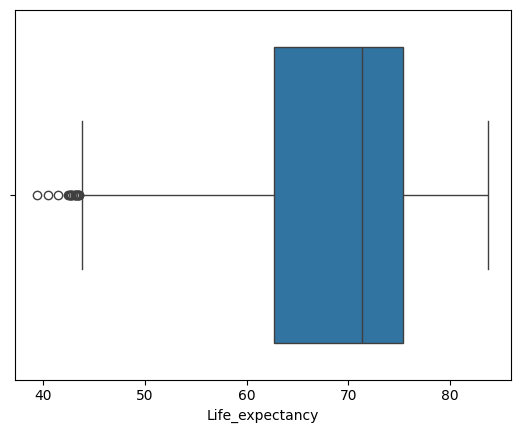

In [27]:
sns.boxplot(data = df.Life_expectancy, orient = 'h')

In [28]:
df.sort_values(by = "Life_expectancy", ascending = True).head(20)
#df.groupby(by = 'Country')[['Life_expectancy']].mean().sort_values(by = "Life_expectancy", ascending = True).head(20)
#df = df[df['Life_expectancy'] > 44]

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
1417,Sierra Leone,Africa,2000,138.1,224.9,531.3245,3.75,71,60,22.0,...,44,1.59,403,4.58,1.3,1.4,2.3,0,1,39.4
1815,Sierra Leone,Africa,2001,135.6,219.4,519.6305,3.98,71,60,22.1,...,38,1.57,364,4.75,1.1,1.2,2.4,0,1,40.4
1923,Sierra Leone,Africa,2002,132.9,213.9,507.9370,3.90,71,60,22.2,...,53,1.53,441,4.97,9.9,1.0,2.5,0,1,41.4
2803,Sierra Leone,Africa,2003,130.2,208.1,495.8585,3.87,72,60,22.2,...,73,1.49,460,5.20,9.7,9.8,2.5,0,1,42.4
1275,Eswatini,Africa,2005,68.3,119.4,597.7545,5.05,95,99,25.9,...,86,19.87,2902,1.03,7.3,7.5,4.5,0,1,42.5
1400,Lesotho,Africa,2006,74.5,116.5,592.0125,2.77,91,80,24.4,...,89,16.06,874,1.99,8.8,8.7,5.4,0,1,42.6
1139,Eswatini,Africa,2004,69.1,119.7,606.7310,5.76,93,99,25.8,...,86,19.93,2749,1.03,7.7,7.9,4.0,0,1,42.7
857,Eswatini,Africa,2006,58.8,109.0,588.7775,6.26,93,99,26.0,...,87,18.94,3060,1.04,6.9,7.1,5.1,0,1,42.7
2294,Lesotho,Africa,2005,74.0,116.1,604.6130,1.94,87,68,24.3,...,89,16.19,836,2.00,9.3,9.2,5.3,0,1,42.7
1222,Lesotho,Africa,2007,73.8,114.3,579.4120,2.85,90,80,24.5,...,88,15.31,912,1.99,8.4,8.3,5.5,0,1,42.9


In [29]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [30]:
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [31]:
df.Region.unique()

array(['Middle East', 'European Union', 'Asia', 'South America',
       'Central America and Caribbean', 'Rest of Europe', 'Africa',
       'Oceania', 'North America'], dtype=object)

In [32]:
df.groupby(by = "Country").count().sort_values(by = "Region", ascending = True)


,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Albania,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Algeria,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Angola,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Antigua and Barbuda,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Vietnam,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
"Yemen, Rep.",16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16


In [33]:
df[df.Country == 'Afghanistan']

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
68,Afghanistan,Asia,2000,90.5,129.2,310.8305,0.020,62,12,21.7,...,24,0.02,148,20.78,2.3,2.5,2.2,0,1,55.8
175,Afghanistan,Asia,2014,55.2,73.6,231.9780,0.010,62,44,23.2,...,62,0.03,565,33.37,17.5,17.5,3.5,0,1,63.0
351,Afghanistan,Asia,2013,57.3,76.9,236.2210,0.010,64,38,23.0,...,64,0.03,569,32.27,17.7,17.7,3.5,0,1,62.5
462,Afghanistan,Asia,2008,69.2,95.7,259.8060,0.028,64,23,22.5,...,64,0.02,399,27.72,18.8,18.9,3.0,0,1,59.9
614,Afghanistan,Asia,2006,74.6,104.1,271.4905,0.026,64,18,22.3,...,58,0.02,354,26.43,19.2,19.3,2.7,0,1,58.8
679,Afghanistan,Asia,2002,85.3,121.1,298.8855,0.020,64,14,21.9,...,36,0.02,320,22.60,19.9,2.2,2.3,0,1,56.8
998,Afghanistan,Asia,2005,77.3,108.4,278.3395,0.016,66,17,22.2,...,58,0.02,346,25.65,19.3,19.5,2.6,0,1,58.3
1059,Afghanistan,Asia,2010,64.2,87.8,250.1350,0.020,66,29,22.7,...,66,0.02,526,29.19,18.4,18.4,3.2,0,1,61.0
1066,Afghanistan,Asia,2015,53.2,70.4,227.7350,0.000,65,42,23.3,...,65,0.03,556,34.41,17.2,17.3,3.6,0,1,63.4
1147,Afghanistan,Asia,2004,80.0,112.6,285.1880,0.020,67,16,22.1,...,50,0.02,323,24.73,19.5,19.7,2.5,0,1,57.8


In [34]:
#sns.pairplot(df)

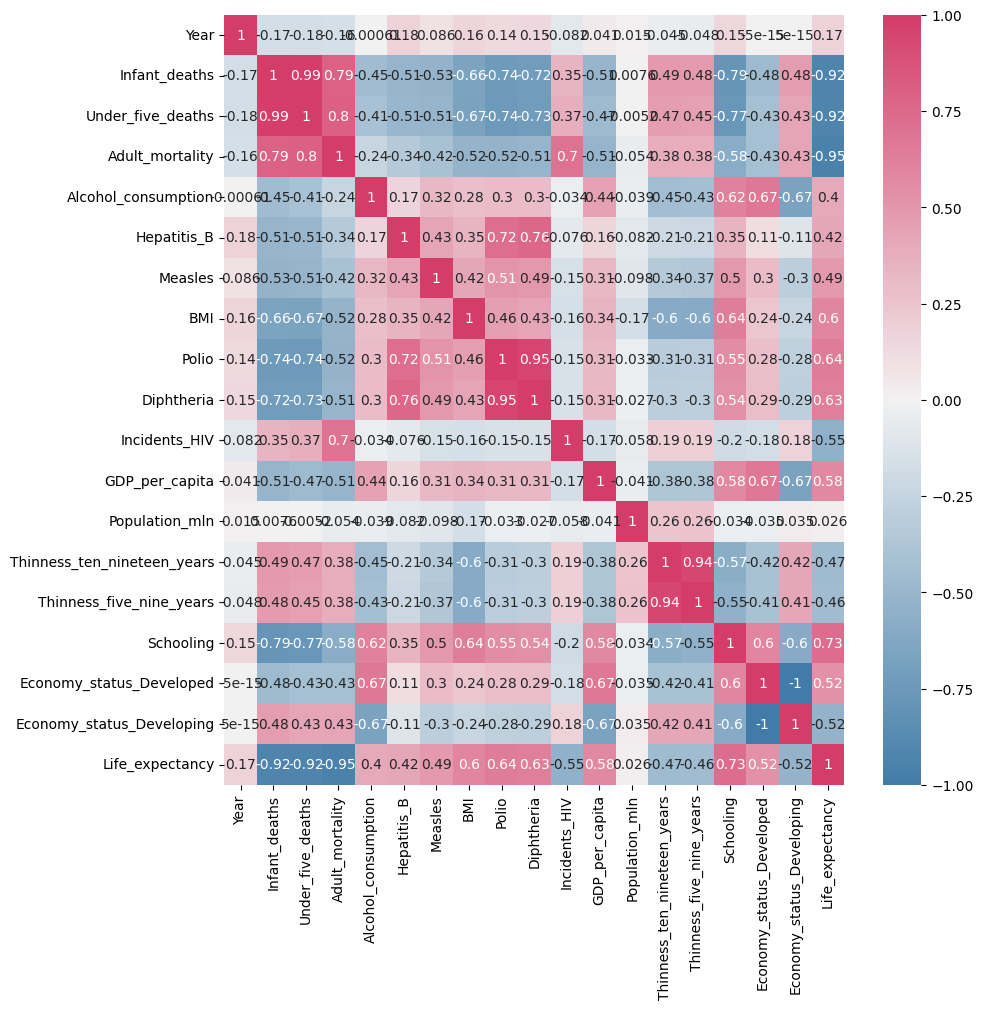

In [35]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap=sns.diverging_palette(240, 0, as_cmap=True))
plt.show()

feature_cols = ['Country',
                 'Region',
                 'Year',
                 'Infant_deaths',
                 'Under_five_deaths',
                 'Adult_mortality',
                 'Alcohol_consumption',
                 'Hepatitis_B',
                 'Measles',
                 'BMI',
                 'Polio',
                 'Diphtheria',
                 'Incidents_HIV',
                 'GDP_per_capita',
                 'Population_mln',
                 'Thinness_ten_nineteen_years',
                 'Thinness_five_nine_years',
                 'Schooling',
                 'Economy_status_Developed',
                 'Economy_status_Developing',
                 'Life_expectancy']
                 

In [36]:
feature_cols = ['Year',
                 'Infant_deaths',
                 'Under_five_deaths',
                 'Adult_mortality',
                 'Alcohol_consumption',
                 'Hepatitis_B',
                 'Measles',
                 'BMI',
                 'Polio',
                 'Diphtheria',
                 'Incidents_HIV',
                 'GDP_per_capita',
                 'Population_mln',
                 'Thinness_ten_nineteen_years',
                 'Thinness_five_nine_years',
                 'Schooling',
                 'Economy_status_Developed',
                 'Economy_status_Developing']
                 

In [37]:
def feature_eng(df):
    df = df.copy()
    df = sm.add_constant(df)

    scale_cols = feature_cols

    def minmax(series):
        return (series - series.min()) / (series.max() - series.min())

    df[scale_cols] = df[scale_cols].apply(minmax)
    
    return df

In [38]:
df = feature_eng(df)

In [39]:
X = df[feature_cols]
X = sm.add_constant(X) # don't forget to add the constant
y = df.Life_expectancy
X.head()

,const,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
0,1.0,1.000000,0.068232,0.048068,0.084242,0.073867,0.977011,0.617978,0.650407,0.978022,0.975904,0.003230,0.096713,0.056857,0.173913,0.164912,0.515385,0.0,1.0
1,1.0,1.000000,0.006603,0.004492,0.012715,0.579183,0.977011,0.943820,0.504065,0.978022,0.975904,0.003692,0.227968,0.033600,0.018116,0.014035,0.661538,1.0,0.0
2,1.0,0.466667,0.364637,0.294699,0.226415,0.087857,0.551724,0.280899,0.113821,0.648352,0.578313,0.005538,0.008266,0.857477,0.978261,0.978947,0.300000,0.0,1.0
3,1.0,0.400000,0.227439,0.171608,0.257938,0.317851,0.931034,0.719101,0.447154,0.923077,0.927711,0.035994,0.035611,0.000486,0.202899,0.189474,0.523077,0.0,1.0
4,1.0,0.800000,0.011739,0.008985,0.012787,0.161724,0.977011,0.887640,0.585366,0.945055,0.939759,0.003230,0.301479,0.005675,0.039855,0.035088,0.900000,1.0,0.0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_test.shape

(573, 19)

In [41]:
lin_reg = sm.OLS(y_train, X_train) # initialising the model object – remember, for sm it's y first and then X
results = lin_reg.fit() # creating an object for the fitted model

y_pred = results.predict(X_train) # adding our predictions back to the table

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     6420.
Date:                Wed, 09 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:18:27   Log-Likelihood:                -3944.1
No. Observations:                2291   AIC:                             7924.
Df Residuals:                    2273   BIC:                             8027.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          52.7966      0.244    216.791      0.000      52.319      53.274
Year                            0.3306      0.095      3.481      0.001       0.144       0.517
Infant_deaths                  -7.2752      0.950     -7.656      0.000      -9.139      -5.412
Under_five_deaths             -11.5026      0.966    -11.912      0.000     -13.396      -9.609
Adult_mortality               -32.3054      0.467    -69.219      0.000     -33.221     -31.390
Alcohol_consumption             1.1888      0.198      6.008      0.000       0.801       1.577
Hepatitis_B                    -0.8082      0.246     -3.285      0.001      -1.291      -0.326
Measles                         0.1812      0.172      1.050      0.294      -0.157       0.519
BMI                            -1.6321      0.266     -6.147      0.000      -2.153      -1.111
Polio                           0.2516      0.601      0.418      0.676      -0.928       1.431
Diphtheria                      0.1576      0.554      0.285      0.776      -0.928       1.243
Incidents_HIV                   2.0737      0.442      4.696      0.000       1.208       2.940
GDP_per_capita                  2.7242      0.288      9.466      0.000       2.160       3.289
Population_mln                 -0.1705      0.304     -0.561      0.575      -0.767       0.426
Thinness_ten_nineteen_years    -1.0117      0.524     -1.929      0.054      -2.040       0.017
Thinness_five_nine_years        0.0575      0.531      0.108      0.914      -0.984       1.099
Schooling                       1.1353      0.245      4.633      0.000       0.655       1.616
Economy_status_Developed       26.7528      0.142    188.991      0.000      26.475      27.030
Economy_status_Developing      26.0438      0.131    199.297      0.000      25.788      26.300
==============================================================================
Omnibus:                       14.275   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.217
Skew:                           0.131   Prob(JB):                     0.000301
Kurtosis:                       3.319   Cond. No.                     1.10e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
statsmodels.tools.eval_measures.rmse(y_train, y_pred )

np.float64(1.3534034517514397)

In [44]:
y_test_pred = results.predict(X_test)
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse)

1.3539870991313134
